<a href="https://colab.research.google.com/github/ChideraFrancisca/Meddical_Appointment/blob/main/medical_appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df['DateTime'] = pd.to_datetime(df['AppointmentDay'])

In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']) # Convert 'ScheduledDay' column to datetime objects
df['Date'] = df['ScheduledDay'].dt.date # Extract the date

In [ ]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']) # Convert 'ScheduledDay' column to datetime objects
df['Date'] = df['AppointmentDay'].dt.date # Extract the date

In [ ]:
df.shape

(110527, 16)

In [ ]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateTime,Date
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07 00:00:00+00:00,2016-06-07
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07 00:00:00+00:00,2016-06-07
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07 00:00:00+00:00,2016-06-07
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07 00:00:00+00:00,2016-06-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df.rename(columns={"Hipertension":"Hypertension","No-show":"No_show"},inplace=True)
df.rename(columns={"Handcap":"Handicap","No-show":"No_show"},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DateTime,Date
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29


In [ ]:
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71817, 16)

In [ ]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DateTime,Date
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 00:00:00+00:00,2016-04-29


In [ ]:
df['Hypertension'].value_counts()

,count
Hypertension,
0,57808
1,14009


In [ ]:
df['Scholarship'].value_counts()

,count
Scholarship,
0,64956
1,6861


In [ ]:
df['Diabetes'].value_counts()

,count
Diabetes,
0,66721
1,5096


In [ ]:
df['Alcoholism'].value_counts()

,count
Alcoholism,
0,70019
1,1798


In [ ]:
df['Handicap'].value_counts()

,count
Handicap,
0,70512
1,1178
2,116
3,8
4,3


In [ ]:
df['SMS_received'].value_counts()

,count
SMS_received,
0,47718
1,24099


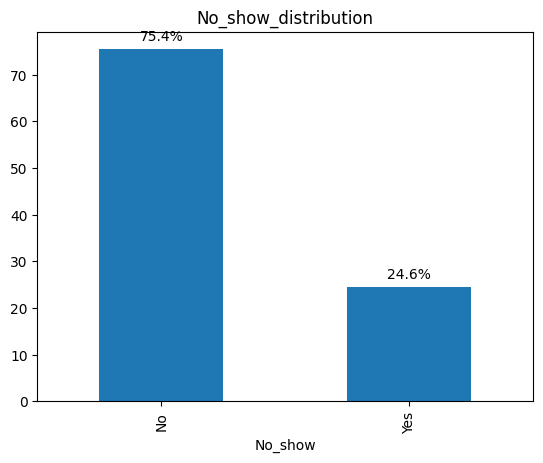

In [ ]:
No_show_distribution = df['No_show'].value_counts(normalize=True)*100
ax =No_show_distribution.plot(kind='bar')

plt.title('No_show_distribution')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

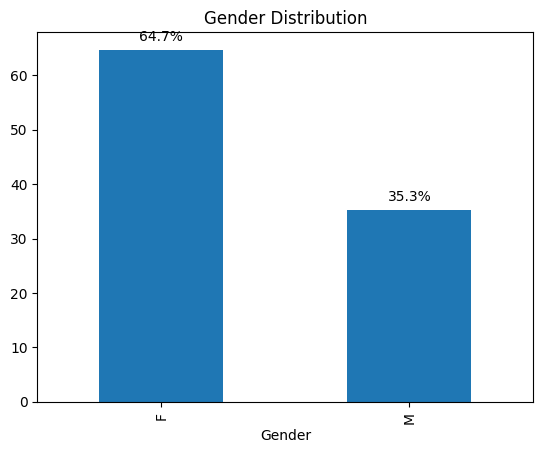

In [ ]:
Genderdistribution = df['Gender'].value_counts(normalize=True)*100
ax =Genderdistribution.plot(kind='bar')

plt.title('Gender Distribution')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

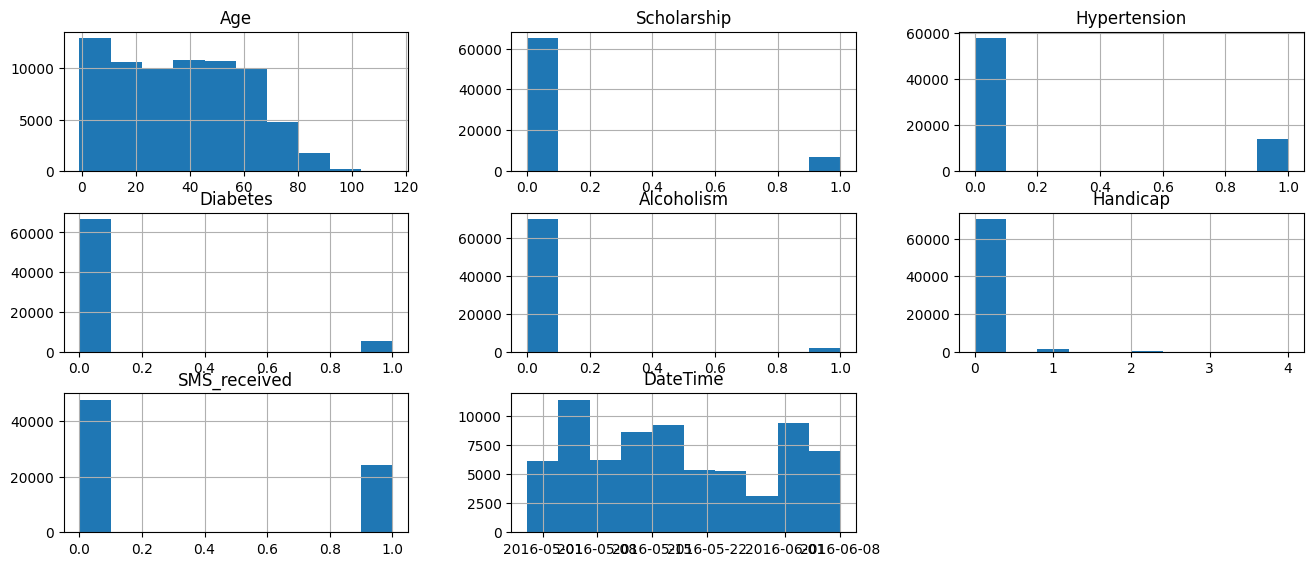

In [ ]:
df.hist(figsize=(16,6.5));

In [ ]:
show=df['No_show']=="No"
Noshow=df['No_show']=="Yes"
df[show].count(),df[Noshow].count()

(Gender           54154
 Age              54154
 Neighbourhood    54154
 Scholarship      54154
 Hypertension     54154
 Diabetes         54154
 Alcoholism       54154
 Handicap         54154
 SMS_received     54154
 No_show          54154
 DateTime         54154
 Date             54154
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handicap         17663
 SMS_received     17663
 No_show          17663
 DateTime         17663
 Date             17663
 dtype: int64)

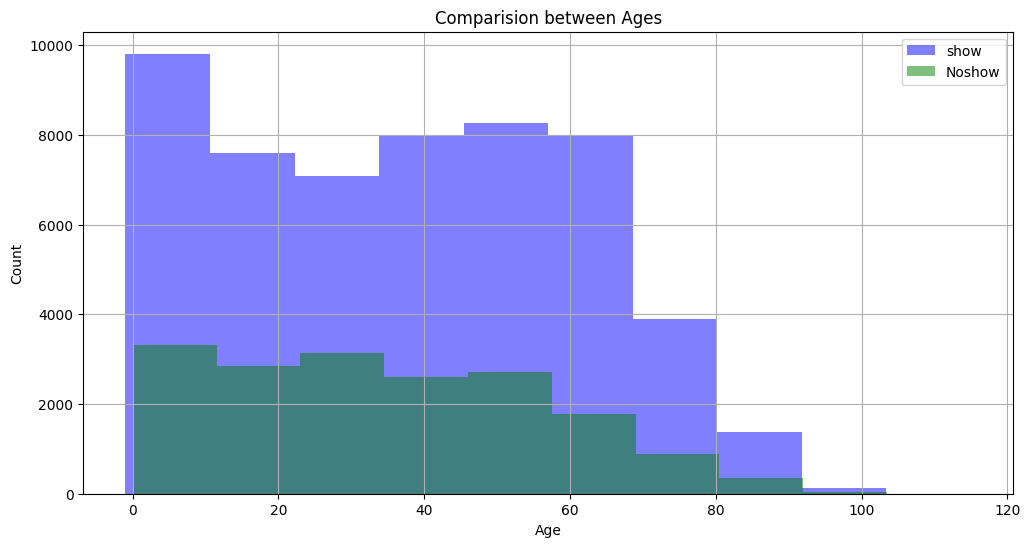

In [ ]:
plt.figure(figsize=[12,6])
df['Age'][show].hist(alpha=0.5,color='blue',label='show')
df['Age'][Noshow].hist(alpha=0.5,color='green',label='Noshow')
plt.legend()
plt.title('Comparision between Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

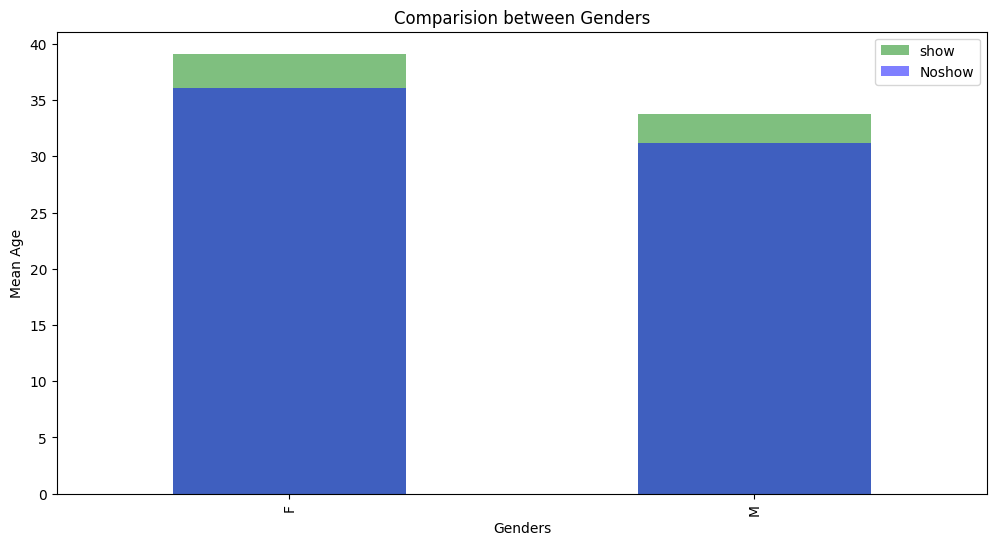

In [ ]:
plt.figure(figsize=[12,6])
df[show].groupby(['Gender'])['Age'].mean().plot.bar(alpha=0.5, color='green',label='show')
df[Noshow].groupby(['Gender'])['Age'].mean().plot.bar(alpha=0.5,color='blue',label='Noshow')
plt.legend()
plt.title('Comparision between Genders')
plt.xlabel('Genders')
plt.ylabel('Mean Age')
plt.show()

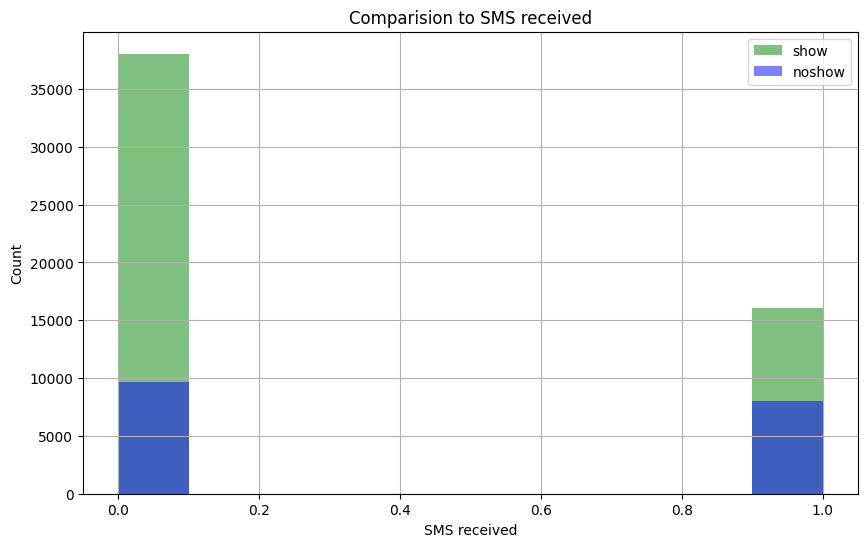

In [ ]:
plt.figure(figsize=[10,6])
df['SMS_received'][show].hist(alpha=0.5,color='green',label='show')
df['SMS_received'][Noshow].hist(alpha=0.5,color='blue',label='noshow')
plt.legend()
plt.title('Comparision to SMS received')
plt.xlabel('SMS received')
plt.ylabel('Count')
plt.show()

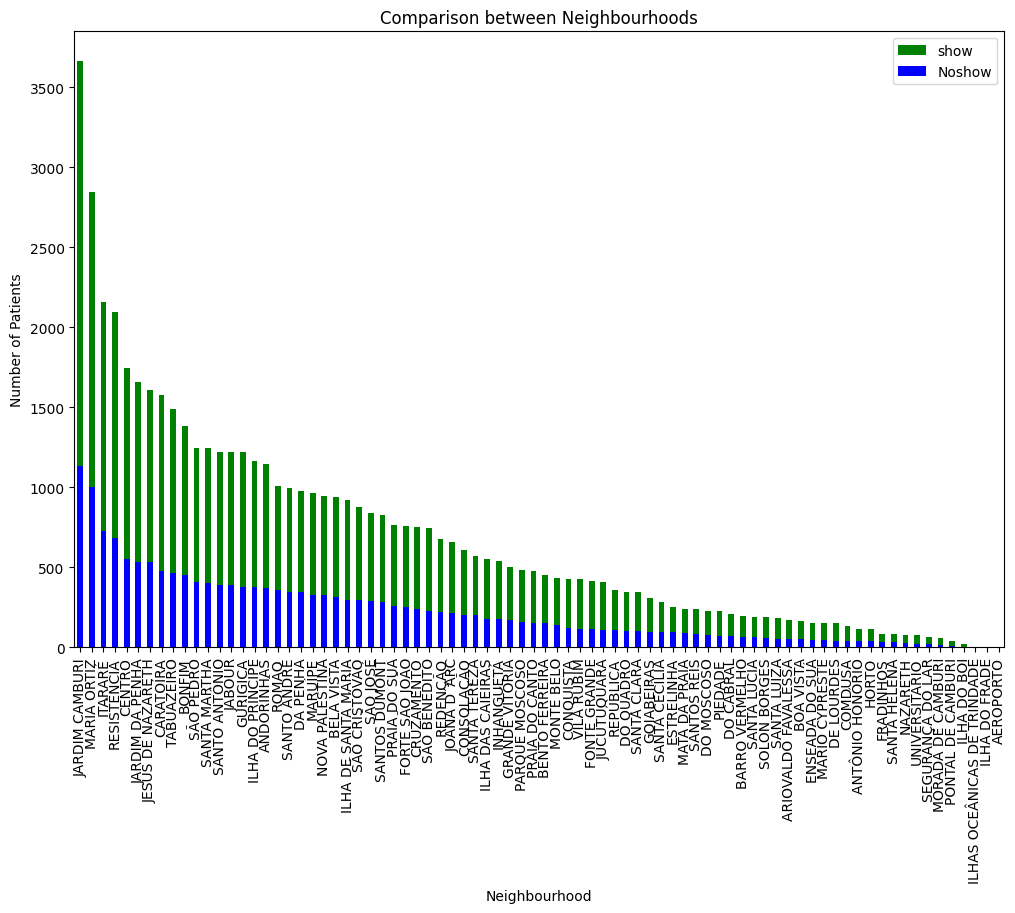

In [ ]:
plt.figure(figsize=[12,8])
df['Neighbourhood'][show].value_counts().plot.bar(color = 'green',label = 'show')
df['Neighbourhood'][Noshow].value_counts().plot.bar(color = 'blue',label = 'Noshow')
plt.legend()
plt.title('Comparison between Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients')
plt.show()